In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers


In [55]:
#I reformat the data that is binned into a integer value
def Age_Binning(AgeBin):
    AgeBin = str(AgeBin)
    if AgeBin == "[  0,  2)":
        return 1
    elif AgeBin == "2":
        return 2
    elif AgeBin == "[  3,  6)":
        return 3
    elif AgeBin == "[  6, 12)":
        return 4
    elif AgeBin == "[ 12, 24)":
        return 5
    elif AgeBin == "[ 24, 60)":
        return 6
    elif AgeBin == "[ 60,255]":
        return 7

def Fee_Binning(FeeBin):
    FeeBin = str(FeeBin)
    if FeeBin == "0":
        return 0
    elif FeeBin == "[   1, 100)":
        return 1
    elif FeeBin == "[ 100, 200)":
        return 2
    elif FeeBin == "[ 200,3000]":
        return 3
    
def Scale_Value_100(x):
    if x and x.isnumeric():
        return int(x)/100
    else:
        #print(x)
        return 0

def Scale_Value_10000(x):
    if x and x.isnumeric():
        return int(x)/10000
    else:
        return 0
    
def Breed_Pure(x):
    if x == "Y":
        return 1
    else:
        return 0
    

In [56]:
global pets_df

pets_df = pd.read_csv("/Users/Ayaan/Downloads/Technical Assessment/data/pets_prepared.csv") #ToDo: Replace with your own location
pets_df.head()
pets_df.info()
pets_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PetID             14993 non-null  object
 1   AdoptionSpeed     14993 non-null  int64 
 2   Type              14993 non-null  int64 
 3   Name              14985 non-null  object
 4   Age               14993 non-null  int64 
 5   Breed1            14993 non-null  int64 
 6   Breed2            14993 non-null  int64 
 7   Gender            14993 non-null  int64 
 8   Color1            14993 non-null  int64 
 9   Color2            14993 non-null  int64 
 10  Color3            14993 non-null  int64 
 11  MaturitySize      14993 non-null  int64 
 12  FurLength         14993 non-null  int64 
 13  Vaccinated        14993 non-null  int64 
 14  Dewormed          14993 non-null  int64 
 15  Sterilized        14993 non-null  int64 
 16  Health            14993 non-null  int64 
 17  Quantity    

,AdoptionSpeed,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,ColorAmt,Adopted
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,2.516441,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,1.994531,0.720069
std,1.177265,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,0.768734,0.448980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,3.000000,1.000000
max,4.000000,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,3.000000,1.000000


               AdoptionSpeed      Type   AgeBins  BreedBins   FeeBins  \
AdoptionSpeed       1.000000 -0.081583  0.167610   0.130142  0.016699   
Type               -0.081583  1.000000 -0.043762  -0.411231  0.018458   
AgeBins             0.167610 -0.043762  1.000000  -0.210924  0.094533   
BreedBins           0.130142 -0.411231 -0.210924   1.000000 -0.142476   
FeeBins             0.016699  0.018458  0.094533  -0.142476  1.000000   
Gender              0.052719  0.047609 -0.147408   0.035677 -0.050872   
Color1             -0.025653  0.044065  0.126485  -0.064259  0.053937   
Color2             -0.029252  0.211763 -0.028943  -0.098325 -0.003276   
Color3             -0.003924  0.192690 -0.073694  -0.085703 -0.008691   
MaturitySize        0.044240 -0.173481  0.115295   0.091924  0.026160   
PhotoAmt           -0.047846  0.069778 -0.078586  -0.001650 -0.004968   
VideoAmt           -0.010339  0.001453 -0.027168   0.022554  0.007859   
FurLength          -0.070882 -0.005963  0.101373  -

<Axes: >

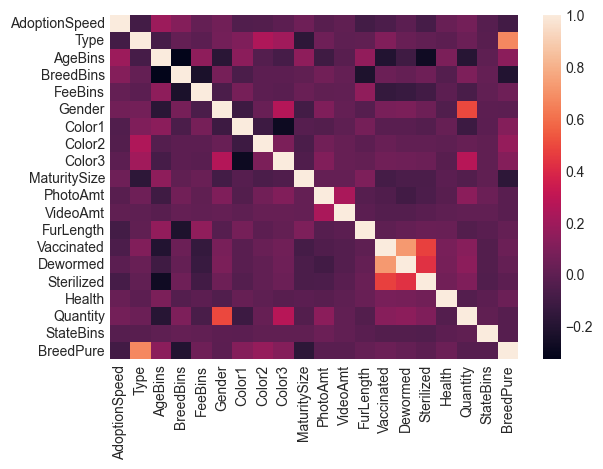

In [84]:
pets_df = pd.read_csv("/Users/Ayaan/Downloads/Technical Assessment/data/pets_prepared.csv") #ToDo: Replace with your own location

#Now we process the data and arrange it in the manner that we need
pets_df["AgeBins"] = pets_df["AgeBins"].map(Age_Binning)
pets_df["FeeBins"] = pets_df["FeeBins"].map(Fee_Binning)
pets_df["BreedBins"] = pets_df["BreedBins"].map(Scale_Value_100)
pets_df["StateBins"] = pets_df["StateBins"].map(Scale_Value_10000)
pets_df["BreedPure"] = pets_df["BreedPure"].map(Breed_Pure)

#After that we test the data to see whether they correlate
processed_df = pets_df.filter(items=["AdoptionSpeed", "Type", "AgeBins", "BreedBins", "FeeBins", "Gender", "Color1", "Color2", "Color3", "MaturitySize", "PhotoAmt", "VideoAmt", 
                                     "FurLength", "Vaccinated", "Dewormed", "Sterilized", "Health", "Quantity", "StateBins", "BreedPure"])

#Here we attempt to find any correlations between data
processed_df.corr()
print(processed_df.corr(method='kendall'))

#sns.pairplot(processed_df.corr())

sns.heatmap(processed_df.corr())


In [85]:
#We must split the data given into a training set, validation set, and test set

print(processed_df.head())

#CHANGE THIS TO INCLUDE A VALIDATION SET

training_set_size = .8*len(processed_df)
training_set, test_set = np.split(processed_df, [int(training_set_size)])

#training_set.head()

   AdoptionSpeed  Type  AgeBins  BreedBins  FeeBins  Gender  Color1  Color2  \
0              2     2        3       2.99        2       1       1       7   
1              0     2        1       2.65        0       1       1       2   
2              3     1        1       3.07        0       1       2       7   
3              2     1        3       3.07        2       2       1       2   
4              2     1        1       3.07        0       1       1       0   

   Color3  MaturitySize  PhotoAmt  VideoAmt  FurLength  Vaccinated  Dewormed  \
0       0             1         1         0          1           2         2   
1       0             2         2         0          2           3         3   
2       0             2         7         0          2           1         1   
3       0             2         8         0          1           1         1   
4       0             2         3         0          1           2         2   

   Sterilized  Health  Quantity  StateBins  

In [86]:
import tensorflow as tf

input_features = {

    "Type":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Type"),

    "AgeBins":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="AgeBins"),
    
    "BreedBins":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="BreedBins"),
    
    "FeeBins":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="FeeBins"),
    
    "Gender":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Gender"),
    
    "Color1":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Color1"),
    
    "Color2":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Color2"),
    
    "Color3":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Color3"),
    
    "MaturitySize":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="MaturitySize"),
    
    "FurLength":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="FurLength"),
    
    "Vaccinated":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Vaccinated"),
    
    "Dewormed":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Dewormed"),
    
    "Sterilized":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Sterilized"),
    
    "Health":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Health"),
    
    "Quantity":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="Quantity"),
    
    "StateBins":
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="StateBins")
}